# Cleaning Data

In [1]:
##Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# read excel file 
df = pd.read_excel("data/masterlistdatacopy.xlsx")

# delete rows with nan values
df.dropna(how='all', inplace=True) 

# Fill NaN values in the TASK column 
df['TASK'] = df['TASK'].interpolate(method ='pad', limit_direction ='forward')

# to find the dates in the TASK column
dates_in_task_col = df['TASK'].str.contains('---')

# to get indexes of the dates in the TASK column
get_idx = dates_in_task_col[dates_in_task_col == True].index 

# Fill NaN values by copying the dates in the TASK column to DATE column
df['DATE'] = df['TASK'].loc[get_idx].interpolate()

# Fill NaN values in the DATE column
df['DATE'] = df['DATE'].interpolate(method ='pad', limit_direction ='forward')

# delete if any row include nan values
df.dropna(how='any',axis=0, inplace=True)

##  fix typs of dates ##

# delete ' - ' s in 'DATE' columnn
df['DATE'] = df['DATE'].str.strip(' - ')

# **** #

# find values containing'2022' in DATE column
findY = df['DATE'].str.contains('2022')

# get indexes that are not containing'2022'
getFalse = findY[findY == False].index

# format dates
a = pd.to_datetime(df['DATE'].loc[getFalse], format='%d %B %a')+ pd.offsets.DateOffset(years=123) # this is because formating returns years as 1900 so it adds 123 years to the default value

# update data
df['DATE'].update(a)

# **** #

# get indexes containing'2022'
getTrue = findY[findY == True].index 

# format dates
b =  pd.to_datetime(df['DATE'].loc[getTrue], format='%d %b %Y %a')

# update data
df['DATE'].update(b)

# **** #

# show only dates not times
df['DATE'] = pd.to_datetime(df['DATE']).dt.date 

df.head(60)

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED
3,2023-01-22,first draft,03:00:00,15:35:00,16:00:00,25.0,✅
4,2023-01-22,first draft,02:00:00,15:10:00,15:35:00,25.0,✅
5,2023-01-22,first draft,01:00:00,14:09:00,14:46:00,25.0,✅
11,2023-01-21,web,02:00:00,01:44:00,02:04:00,19.0,❌
12,2023-01-21,web,01:00:00,01:19:00,01:44:00,25.0,✅
18,2023-01-19,Eng,01:00:00,11:02:00,13:01:00,25.0,✅
24,2023-01-18,Eng,01:00:00,17:57:00,18:03:00,6.0,❌
30,2023-01-17,Math 111,11:00:00,12:21:00,12:46:00,25.0,✅
31,2023-01-17,Math 111,10:00:00,11:56:00,12:21:00,25.0,✅
32,2023-01-17,Math 111,09:00:00,11:30:00,11:54:00,25.0,✅


In [2]:
df_copy = df.copy()


df_copy.loc[df_copy['TASK'].str.contains('153'), 'TASK'] = 'MATH 153'
df_copy.loc[df_copy['TASK'].str.contains('April|March|February|Revision|Eng'), 'TASK'] = 'Eng revision'
df_copy.loc[df_copy['TASK'].str.contains('Py'), 'TASK'] = 'Python'

time_spent = df_copy.groupby(['TASK']).sum()
time_spent.sort_values(by=['TIME FOCUSED'], ascending= False).head(10)

,TIME FOCUSED
TASK,
React,7566.0
MATH 153,6653.0
firebase,6501.0
Javascript,4301.0
Math 111,3861.0
Eng revision,3819.0
PHYS 111,3638.0
rebuidling,2701.0
学习中文,2060.0


In [3]:
checklist = pd.Series(['MATH', 'PHYS','IELTS','English',
               'Drone Simulation','Habbits & Hobbies',
               '中国','game - JavaScript','College Admission', 
               'Chess-Like Game', 'Python Programming','Volunteer Works'])
checklist

0                   MATH
1                   PHYS
2                  IELTS
3                English
4       Drone Simulation
5      Habbits & Hobbies
6                     中国
7      game - JavaScript
8      College Admission
9        Chess-Like Game
10    Python Programming
11       Volunteer Works
dtype: object

In [4]:
df_copy['CHECKLIST'] = np.nan
df_copy

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED,CHECKLIST
3,2023-01-22,first draft,03:00:00,15:35:00,16:00:00,25.0,✅,NaN
4,2023-01-22,first draft,02:00:00,15:10:00,15:35:00,25.0,✅,NaN
5,2023-01-22,first draft,01:00:00,14:09:00,14:46:00,25.0,✅,NaN
11,2023-01-21,web,02:00:00,01:44:00,02:04:00,19.0,❌,NaN
12,2023-01-21,web,01:00:00,01:19:00,01:44:00,25.0,✅,NaN
...,...,...,...,...,...,...,...,...
6408,2022-02-28,Eng revision,05:00:00,08:28:00,08:53:00,25.0,✅,NaN
6412,2022-02-28,Workshop,04:00:00,06:43:00,07:08:00,25.0,✅,NaN
6416,2022-02-28,IELTS,03:00:00,05:42:00,06:07:00,25.0,✅,NaN
6417,2022-02-28,IELTS,02:00:00,05:05:00,05:30:00,25.0,✅,NaN


In [5]:
df_copy.loc[df_copy['TASK'].str.contains('Py|Numpy|Academy'), 'CHECKLIST'] = checklist[10]


# Pie Chart 

## Create Data for Pie Chart 

In [6]:
#  create a dataframe with necessary data
pie_data = df_copy[['TIME FOCUSED','TASK','DATE']].copy()

#  Filter the dataframe by the desired date range
start_date = pd.to_datetime('2022-07-22')
end_date = pd.to_datetime('2023-01-22')
pie_data = pie_data[(pie_data['DATE'] >= start_date) & (pie_data['DATE'] <= end_date)]

# Group the data by task and sum the time focused
pie_data = pie_data.groupby('TASK')['TIME FOCUSED'].sum().reset_index()

# sort the dataframe by Time Focused in descending order
pie_data = pie_data.sort_values(by='TIME FOCUSED',ascending= False ).head()


/Users/zehrakaya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


## Seaborn & matplotlib.pyplot codes

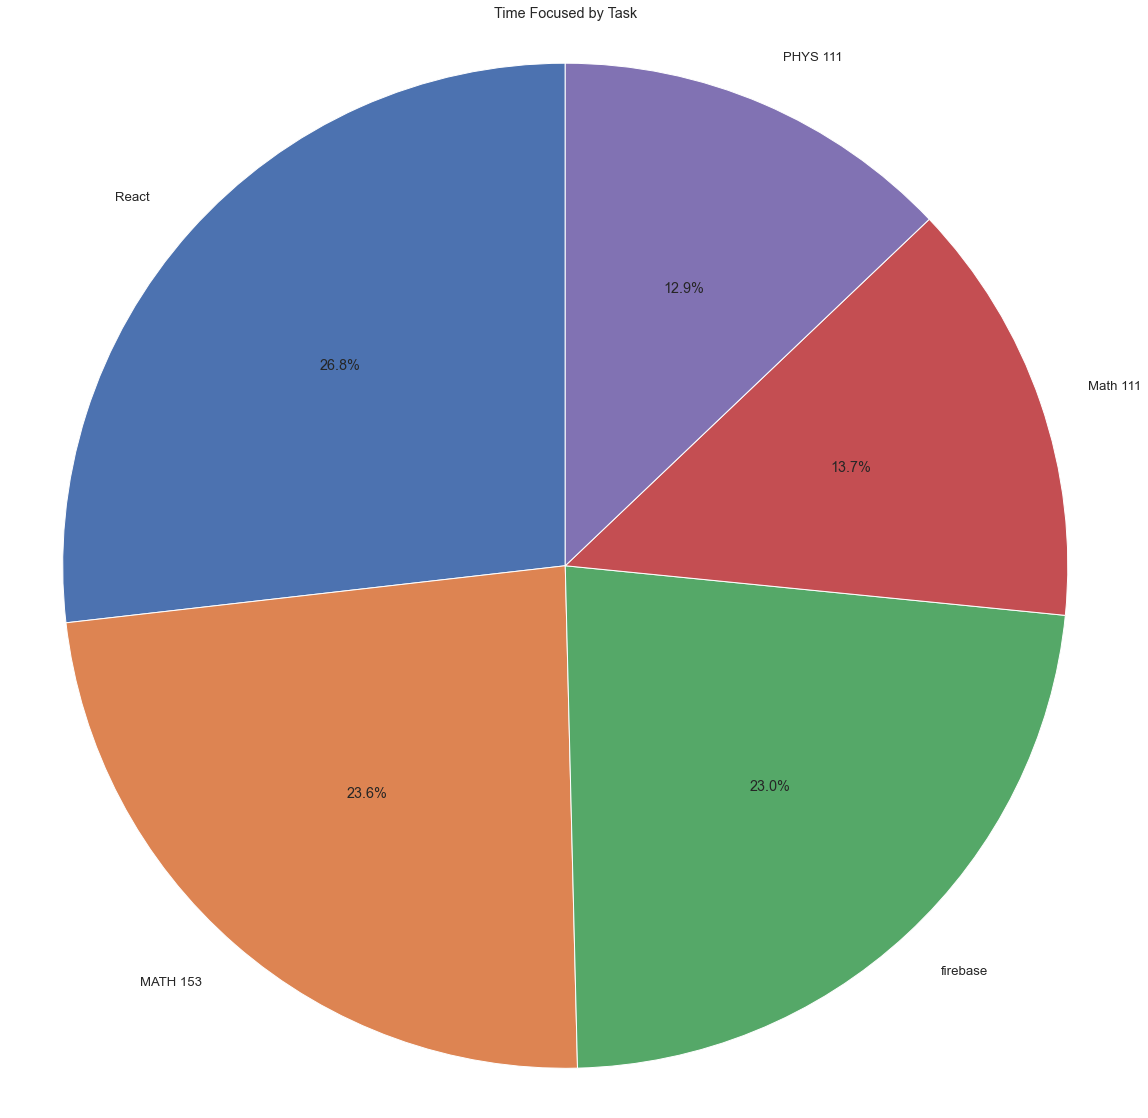

In [7]:
# create the pie chart using seaborn
plt.figure(figsize=(15, 15))
sns.set_palette("pastel")
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.title('Time Focused by Task')

plt.pie(pie_data['TIME FOCUSED'], labels=pie_data['TASK'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()